In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


In [ ]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Predictor variables (X)
X =df.drop(columns=['output'])

# Response variable (Y)
Y = df['output']

# Print the predictor and response variable
print("Predictor variables (X):\n", X.head())
print("\nResponse variable (Y):\n", Y.head())

Predictor variables (X):
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  

Response variable (Y):
 0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


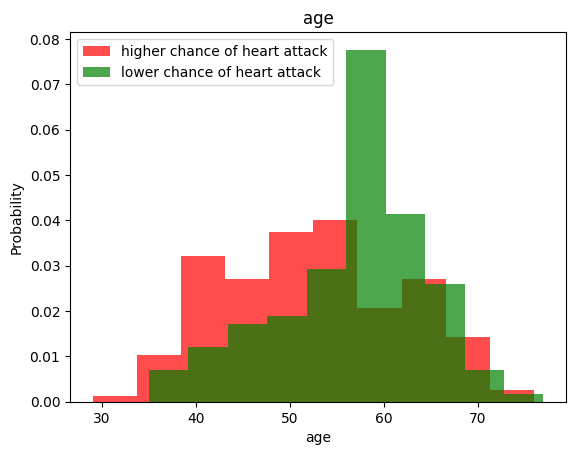

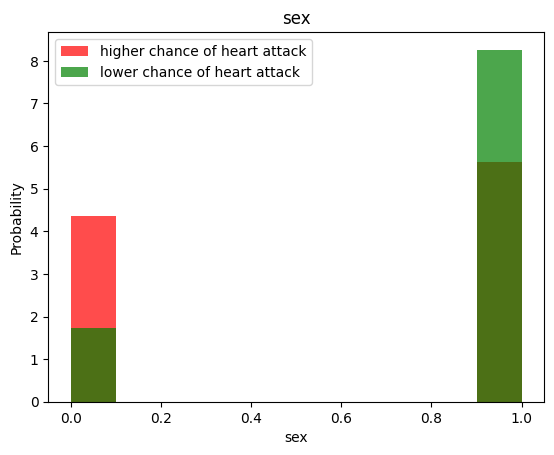

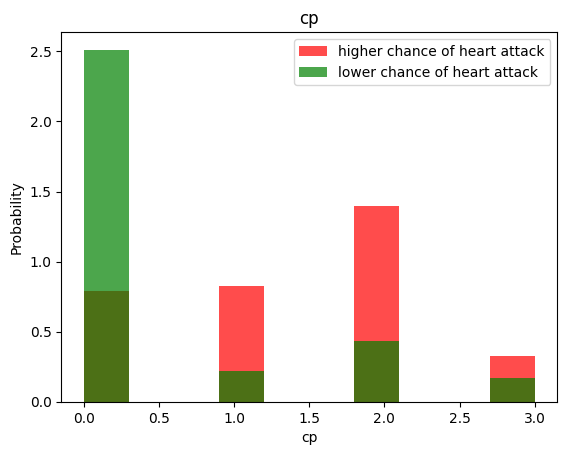

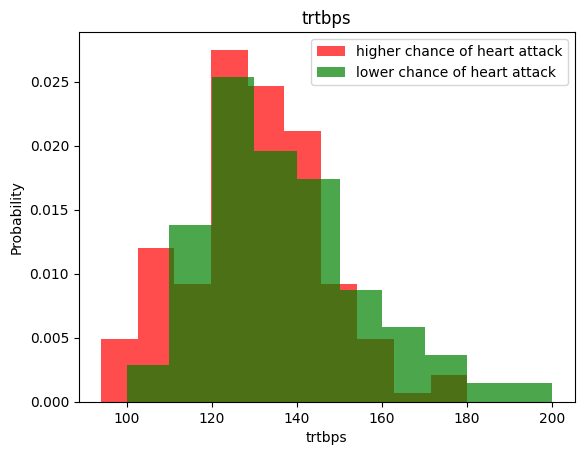

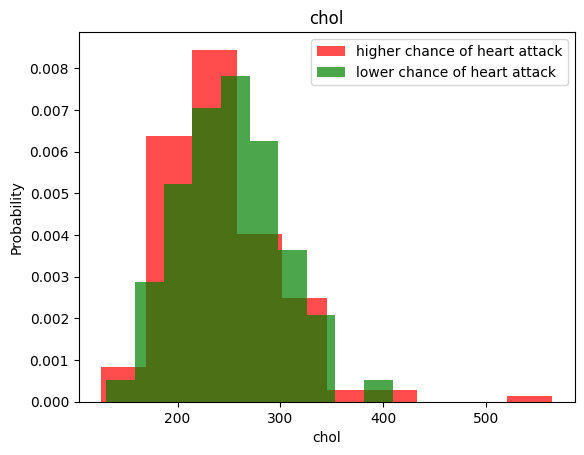

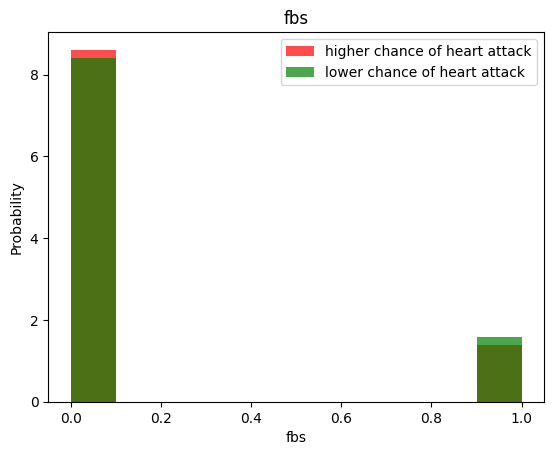

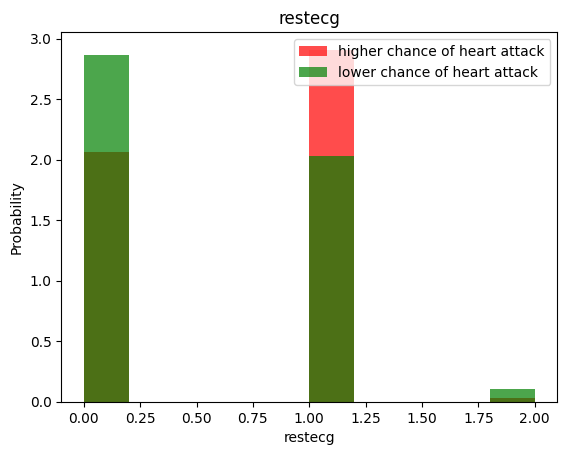

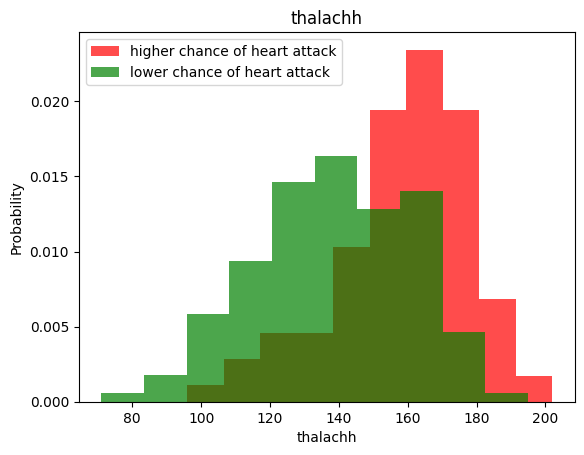

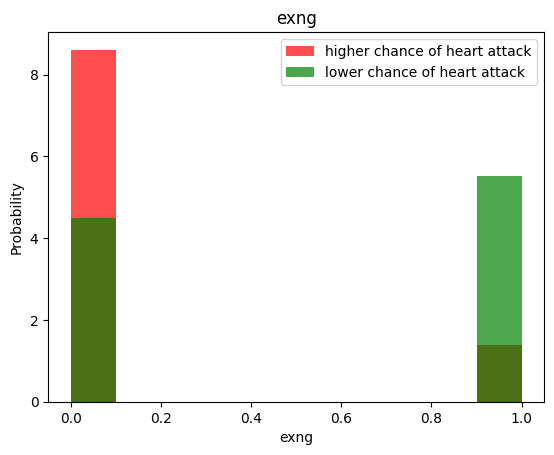

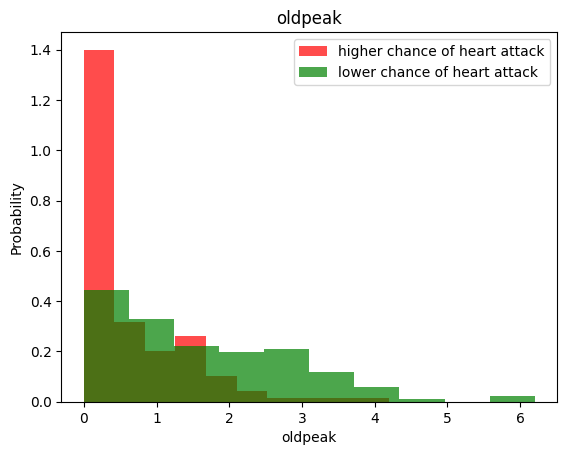

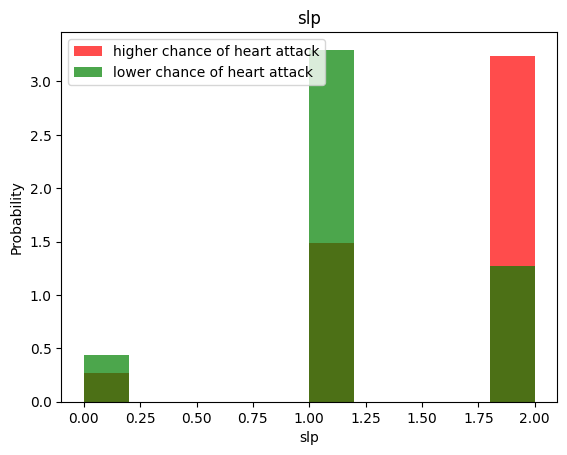

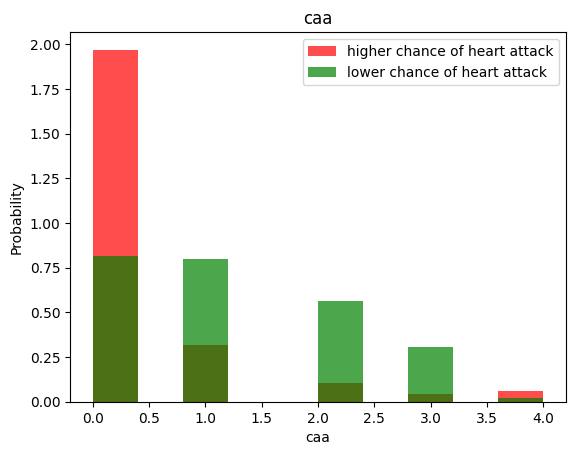

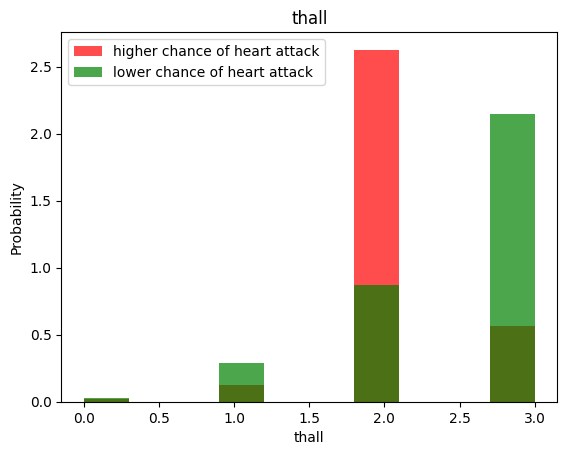

In [ ]:
for label in df.columns[:-1]:
  plt.hist(df[df["output"]==1][label],color='red',label="higher chance of heart attack",alpha=0.7,density=True)
  plt.hist(df[df["output"]==0][label],color='green',label="lower chance of heart attack",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Splitting the data into train & test data 80:20(First Case)

In [ ]:
train,test=np.split(df.sample(frac=1),[int(0.8*len(df))])


In [ ]:
# Importing the required modules for scaling data
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def scale_dataset(data, oversample=False):


  # Scale the data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data.drop('output', axis=1))

  # Separate features and labels
  features = scaled_data
  labels = data['output']

  # Oversample the data
  if oversample:
    smote = SMOTE(random_state=42)
    features, labels = smote.fit_resample(features, labels)

  return data, features, labels

# Scale the train and test data
train, X_train, Y_train = scale_dataset(train, oversample=True)
test, X_test, Y_test = scale_dataset(test, oversample=True)

In [ ]:
# Print shapes of the arrays
print("Shapes for train, X_train, and Y_train:")
print("Train shape:", train.shape)
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

print("\nShapes for test, X_test, and Y_test:")
print("Test shape:", test.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Shapes for train, X_train, and Y_train:
Train shape: (242, 14)
X_train shape: (270, 13)
Y_train shape: (270,)

Shapes for test, X_test, and Y_test:
Test shape: (61, 14)
X_test shape: (62, 13)
Y_test shape: (62,)


# Applying different classifications models on data (KNN,SVM,Naivebayes,Logestic Regression and LDA classifier) [80:20]

In [ ]:
#Will give confusion matrix and classification report for each classifier for two thresholds 0.5 & 0.6 for 80:20 train-test.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

# A function to train and evaluate a classifier
def train_and_evaluate(classifier, X_train, Y_train, X_test, Y_test,threshold=0.5):
    # Train the classifier
    classifier.fit(X_train, Y_train)

    # Predict probabilities
    Y_prob = classifier.predict_proba(X_test)[:, 1]

    # Apply threshold
    Y_pred = (Y_prob > threshold).astype(int)
ts
    # Print confusion matrix
    print("Confusion Matrix (Threshold = {}):".format(threshold))
    print(confusion_matrix(Y_test, Y_pred))

    # Print classification report
    print("\nClassification Report (Threshold = {}):".format(threshold))
    print(classification_report(Y_test, Y_pred))

# Initialize classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC(probability=True)  # Set probability=True for SVC to enable probability estimates
nb_classifier = GaussianNB()
lr_classifier = LogisticRegression()
lda_classifier = LinearDiscriminantAnalysis()

# Train and evaluate classifiers
classifiers = [knn_classifier, svm_classifier, nb_classifier, lr_classifier, lda_classifier]
classifier_names = ['KNN', 'SVM', 'Naive Bayes', 'Logistic Regression', 'LDA']

# Define threshold values
thresholds = [0.5, 0.6]

# Loop over classifiers and threshold values
for classifier, name in zip(classifiers, classifier_names):
    for threshold in thresholds:
        print("\nTraining and evaluating", name, "classifier with threshold", threshold)
        train_and_evaluate(classifier, X_train, Y_train, X_test, Y_test, threshold)




Training and evaluating KNN classifier with threshold 0.5
Confusion Matrix (Threshold = 0.5):
[[28  3]
 [ 7 24]]

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        31
           1       0.89      0.77      0.83        31

    accuracy                           0.84        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.84      0.84      0.84        62


Training and evaluating KNN classifier with threshold 0.6
Confusion Matrix (Threshold = 0.6):
[[28  3]
 [ 7 24]]

Classification Report (Threshold = 0.6):
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        31
           1       0.89      0.77      0.83        31

    accuracy                           0.84        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.84      0.84      0.84        62


Training and evaluating SVM class

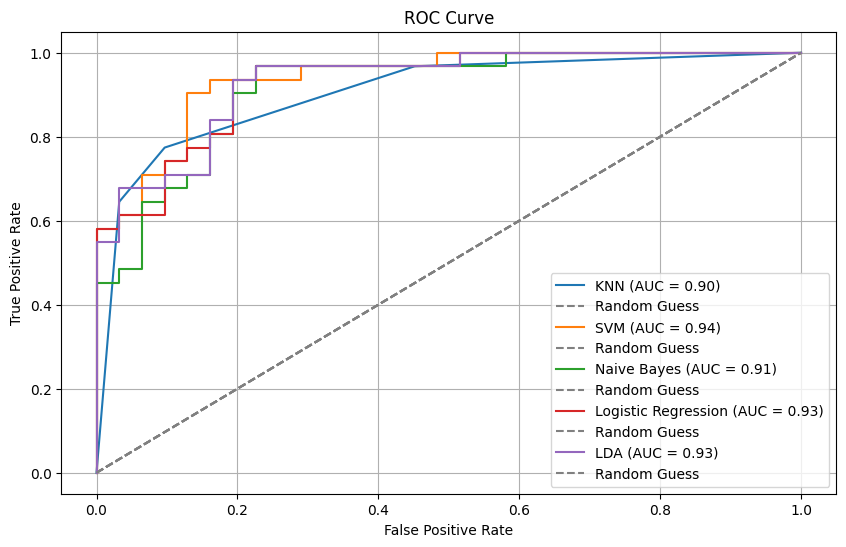

In [ ]:

from sklearn.metrics import roc_curve, auc

# Define a function to plot ROC-AUC curve
def plot_roc_curve(classifier, X_test, Y_test, name):
    # Predict probabilities
    Y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

    # Calculate area under the curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=name + ' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)


for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train, Y_train)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
for classifier, name in zip(classifiers, classifier_names):
    plot_roc_curve(classifier, X_test, Y_test, name)
plt.legend(loc='lower right')
plt.show()


# Splitting the data into train & test data 70:30(Second Case)

In [ ]:
train2,test2=np.split(df.sample(frac=1),[int(0.7*len(df))])


In [ ]:
# Scale the train and test data
train2, X_train2, Y_train2 = scale_dataset(train2, oversample=True)
test2, X_test2, Y_test2 = scale_dataset(test2, oversample=True)


In [ ]:
# Print shapes of the arrays
print("Shapes for train, X_train, and Y_train:")
print("Train shape:", train2.shape)
print("X_train shape:", X_train2.shape)
print("Y_train shape:", Y_train2.shape)

print("\nShapes for test, X_test, and Y_test:")
print("Test shape:", test2.shape)
print("X_test shape:", X_test2.shape)
print("Y_test shape:", Y_test2.shape)


Shapes for train, X_train, and Y_train:
Train shape: (212, 14)
X_train shape: (220, 13)
Y_train shape: (220,)

Shapes for test, X_test, and Y_test:
Test shape: (91, 14)
X_test shape: (110, 13)
Y_test shape: (110,)


# Applying different classifications models on data (KNN,SVM,Naivebayes,Logestic Regression and LDA classifier) [70:30]

In [ ]:
#Will give confusion matrix and classification report for each classifier for two thresholds 0.5 & 0.6 for 70:30 train-test.

# Loop over classifiers and threshold values
for classifier, name in zip(classifiers, classifier_names):
    for threshold in thresholds:
        print("\nTraining and evaluating", name, "classifier with threshold", threshold)
        train_and_evaluate(classifier, X_train2, Y_train2, X_test2, Y_test2, threshold)




Training and evaluating KNN classifier with threshold 0.5
Confusion Matrix (Threshold = 0.5):
[[41 14]
 [10 45]]

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        55
           1       0.76      0.82      0.79        55

    accuracy                           0.78       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.78      0.78      0.78       110


Training and evaluating KNN classifier with threshold 0.6
Confusion Matrix (Threshold = 0.6):
[[41 14]
 [10 45]]

Classification Report (Threshold = 0.6):
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        55
           1       0.76      0.82      0.79        55

    accuracy                           0.78       110
   macro avg       0.78      0.78      0.78       110
weighted avg       0.78      0.78      0.78       110


Training and evaluating SVM class

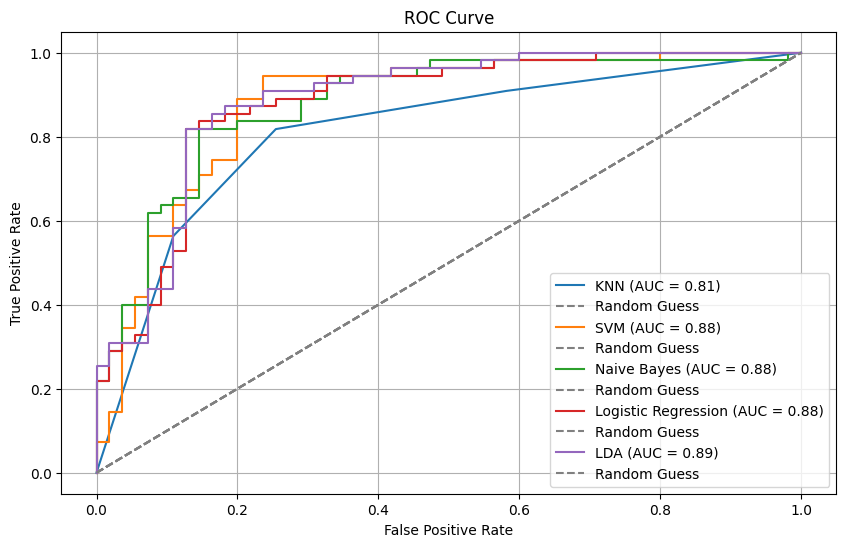

In [ ]:
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train2, Y_train2)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 6))
for classifier, name in zip(classifiers, classifier_names):
    plot_roc_curve(classifier, X_test2, Y_test2, name)
plt.legend(loc='lower right')
plt.show()

# Ablation Study for 80:20 and threshold=0.5

In [ ]:
from sklearn.metrics import accuracy_score
def ablation_study(classifier, X_train, Y_train, X_test, Y_test):
    feature_accuracies = {}

    # Iterate over each feature
    for feature in X_train.columns:
        # Train the classifier with only the current feature
        classifier.fit(X_train[[feature]], Y_train)

        # Predict on the test set
        Y_pred = classifier.predict(X_test[[feature]])

        # Calculate accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        # Store accuracy for the current feature
        feature_accuracies[feature] = accuracy

    # Sort features by accuracy
    sorted_features = sorted(feature_accuracies, key=feature_accuracies.get, reverse=True)

    return sorted_features


In [ ]:


# Convert arrays to DataFrames
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1])

# Perform ablation study for each classifier
for classifier, name in zip(classifiers, classifier_names):
    print("\nAblation study for", name, "classifier:")
    sorted_features = ablation_study(classifier, X_train_df, Y_train, X_test_df, Y_test)

    # Print ranked features
    print("Ranked features based on accuracy:")
    for i, feature in enumerate(sorted_features):
        print(f"{i+1}. {feature}")



Ablation study for KNN classifier:
Ranked features based on accuracy:
1. slp
2. cp
3. restecg
4. thalachh
5. age
6. fbs
7. exng
8. caa
9. thall
10. trtbps
11. oldpeak
12. chol
13. sex

Ablation study for SVM classifier:
Ranked features based on accuracy:
1. cp
2. thall
3. exng
4. oldpeak
5. caa
6. thalachh
7. slp
8. age
9. sex
10. restecg
11. trtbps
12. chol
13. fbs

Ablation study for Naive Bayes classifier:
Ranked features based on accuracy:
1. cp
2. thall
3. exng
4. oldpeak
5. thalachh
6. slp
7. caa
8. age
9. sex
10. restecg
11. trtbps
12. chol
13. fbs

Ablation study for Logistic Regression classifier:
Ranked features based on accuracy:
1. cp
2. thall
3. exng
4. oldpeak
5. caa
6. thalachh
7. age
8. slp
9. sex
10. restecg
11. trtbps
12. chol
13. fbs

Ablation study for LDA classifier:
Ranked features based on accuracy:
1. cp
2. thall
3. exng
4. caa
5. thalachh
6. age
7. oldpeak
8. slp
9. sex
10. restecg
11. trtbps
12. chol
13. fbs


#Bar Graph & Performance metrices values for all case.

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define function to calculate performance metrics
def calculate_metrics(classifier, X_train, Y_train, X_test, Y_test, threshold):
    # Train the classifier
    classifier.fit(X_train, Y_train)

    # Predict probabilities
    Y_prob = classifier.predict_proba(X_test)[:, 1]

    # Apply threshold
    Y_pred = (Y_prob > threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_prob)

    return accuracy, precision, recall, f1, roc_auc


In [ ]:
# Initializing dictionaries to store metrics
metrics_80_20 = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC-AUC': []}
metrics_70_30 = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC-AUC': []}


# Loop over classifiers and threshold values
for classifier, name in zip(classifiers, classifier_names):
    for threshold in thresholds:
        # Calculate metrics for 80:20 split
        accuracy_80_20, precision_80_20, recall_80_20, f1_80_20, roc_auc_80_20 = calculate_metrics(classifier, X_train, Y_train, X_test, Y_test, threshold)

        # Append metrics to dictionary for 80:20 split
        metrics_80_20['Accuracy'].append(accuracy_80_20)
        metrics_80_20['Precision'].append(precision_80_20)
        metrics_80_20['Recall'].append(recall_80_20)
        metrics_80_20['F1 Score'].append(f1_80_20)
        metrics_80_20['ROC-AUC'].append(roc_auc_80_20)

        # Calculate metrics for 70:30 split
        accuracy_70_30, precision_70_30, recall_70_30, f1_70_30, roc_auc_70_30 = calculate_metrics(classifier, X_train2, Y_train2, X_test2, Y_test2, threshold)

        # Append metrics to dictionary for 70:30 split
        metrics_70_30['Accuracy'].append(accuracy_70_30)
        metrics_70_30['Precision'].append(precision_70_30)
        metrics_70_30['Recall'].append(recall_70_30)
        metrics_70_30['F1 Score'].append(f1_70_30)
        metrics_70_30['ROC-AUC'].append(roc_auc_70_30)



In [ ]:
def plot_bar_graph(metrics_df, title):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set the width of each bar
    bar_width = 0.2
    index = np.arange(len(metrics_df))

    # Define color palette for bars
    colors = ['b', 'g', 'r', 'c', 'm']

    # Iterate over metrics and plot bars for each metric
    for i, (metric_name, metric_values) in enumerate(metrics_df.items()):
        # Calculate the position of bars for each classifier
        bar_positions = index + i * bar_width - (len(metrics_df.columns) - 1) * bar_width / 2

        # Plot bars for each classifier
        ax.bar(bar_positions, metric_values, bar_width, label=metric_name, color=colors[i])

    # Set labels and title
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(metrics_df.index)
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()


In [ ]:
metrics_80_20_df = pd.DataFrame.from_dict(metrics_80_20, orient='index')  # converting from dictionary to dataframe
metrics_70_30_df = pd.DataFrame.from_dict(metrics_70_30, orient='index')





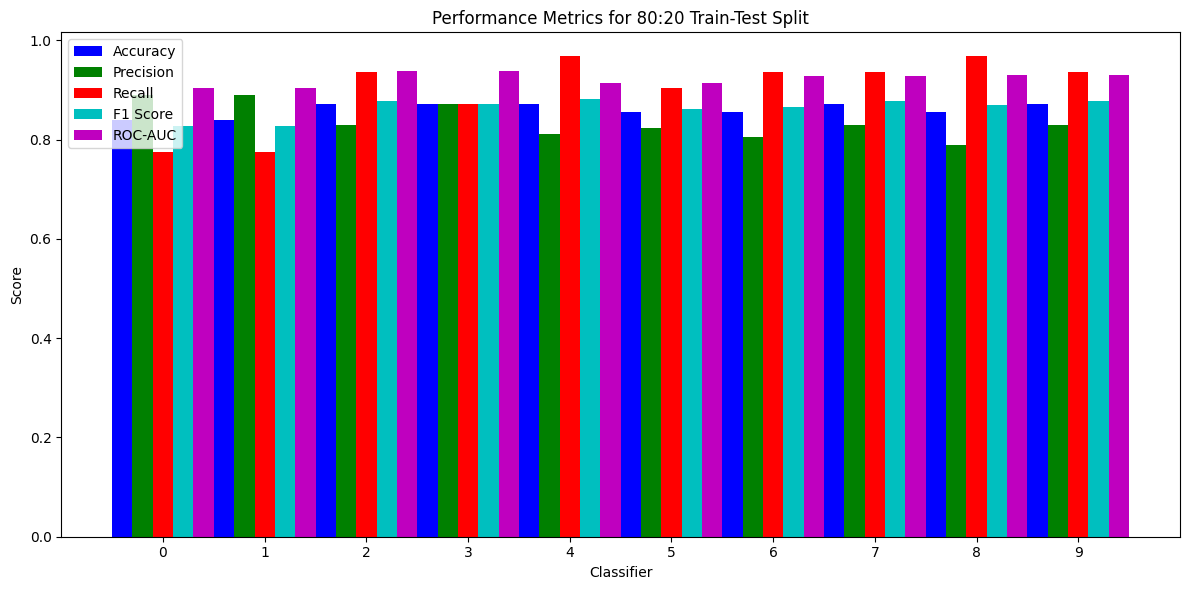

In [ ]:
plot_bar_graph(metrics_80_20_df.T,'Performance Metrics for 80:20 Train-Test Split')

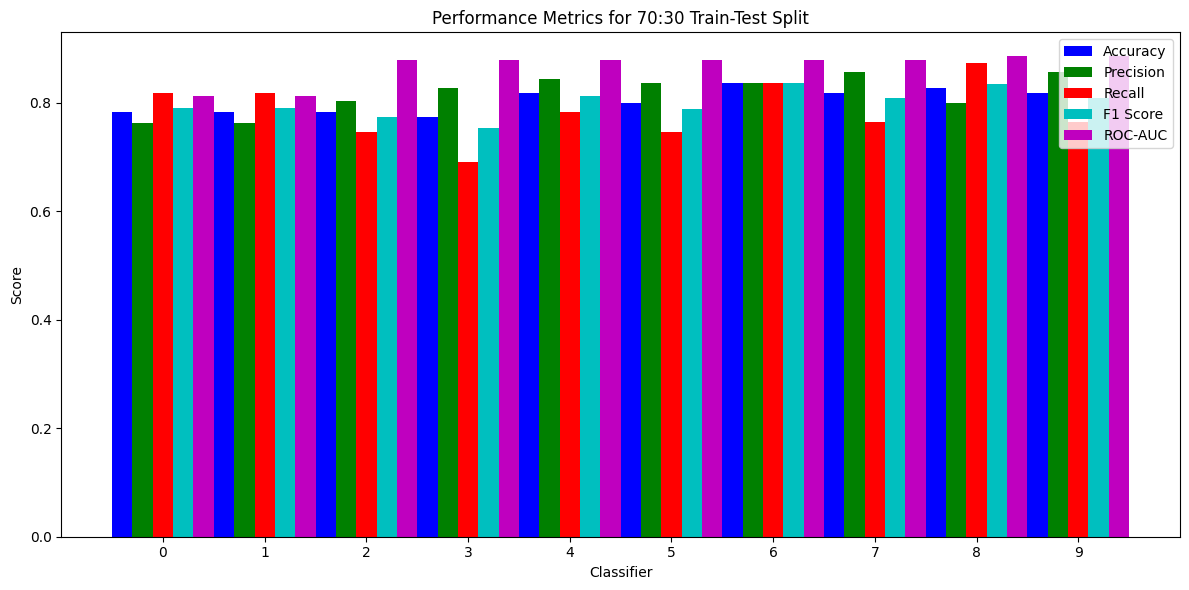

In [ ]:
plot_bar_graph(metrics_70_30_df.T,'Performance Metrics for 70:30 Train-Test Split')

In [ ]:
print(metrics_80_20_df.T)

   Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  0.838710   0.888889  0.774194  0.827586  0.904787
1  0.838710   0.888889  0.774194  0.827586  0.904787
2  0.870968   0.828571  0.935484  0.878788  0.938606
3  0.870968   0.870968  0.870968  0.870968  0.938606
4  0.870968   0.810811  0.967742  0.882353  0.913632
5  0.854839   0.823529  0.903226  0.861538  0.913632
6  0.854839   0.805556  0.935484  0.865672  0.928200
7  0.870968   0.828571  0.935484  0.878788  0.928200
8  0.854839   0.789474  0.967742  0.869565  0.929240
9  0.870968   0.828571  0.935484  0.878788  0.929240


In [ ]:
print(metrics_70_30_df.T)

   Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  0.781818   0.762712  0.818182  0.789474  0.813058
1  0.781818   0.762712  0.818182  0.789474  0.813058
2  0.781818   0.803922  0.745455  0.773585  0.878678
3  0.772727   0.826087  0.690909  0.752475  0.878678
4  0.818182   0.843137  0.781818  0.811321  0.879008
5  0.800000   0.836735  0.745455  0.788462  0.879008
6  0.836364   0.836364  0.836364  0.836364  0.878347
7  0.818182   0.857143  0.763636  0.807692  0.878347
8  0.827273   0.800000  0.872727  0.834783  0.885289
9  0.818182   0.857143  0.763636  0.807692  0.885289
